## Телеком-компания "НуПозвони!"

### Декомпозиция проекта

**Описание проекта:**
    К нам обратился коммерческий директор телекоммуникационной компании "НуПозвони". В связи с потенциальным выходом на рынок конкурента с более выгодными тарифами он попросил нас изучить данные о клиентах - колл-центров юр.лиц и том, как они используют свои тарифы, для  того, чтобы определить активных клиентов, которые используют свои тарифы неоптимально, и предложить им более выгодные тарифы, чтобы исключить их переход к конкуренту, но при этом не сильно срезать выручку нашей компании. 
    
**Цель проекта:**
    Определить клиентов, которые неоптимально используют свои тарифы и найти те тарифы, которые можно было бы предложить им взамен, для повышения их лояльности и снижения вероятности их оттока, но без существенного понижения выручки компании. 
    
**Задачи (подзадачи):**   
    - Рассчитать для всех клиентов их затраты.  
    - Определить активных клиентов.  
    - Определить активных клиентов, которые используют свои тарифы неоптимально (переплачивают).  
    - Определить какие оптимальные тарифы можно им предложить.   
    - Определить насколько изменится наша выручка.  
    - Найти пути минимизации потерь (оценить результаты и дать рекомендации).   
    
    
**Итоговый результат:** исследование в тетрадке Jupyter notebook, файл со списком пользователей, которые неоптимально используют свои тарифы, дэшборд, презентация с результатами исследования

**Характеристика данных**: Необходимо провести исследование двух датасетов, которые характеризуют использование услуг «НуПозвони». Исследование необходимо проводить с учетом того, что оно будет повторяться каждые 3 месяца, поэтому код следует писать универсально и предусматривать диапазон исследования, ограниченный тремя месяцами. 

1. датасет `telecom_dataset.csv`
- `user_id` - идентификатор клиента,
- `date` - дата;
- `direction` - направление вызовов: out — исходящий вызов, in — входящий; 
- `internal` - маркер внутренних и внешних вызовов; вызовы между сотрудниками одного колл-центра называют внутренними, остальные — внешними.
- `operator_id` - идентификатор оператора;
- `is_missed_call` - маркер пропущенных вызовов;
- `calls_count` - количество звонков;
- `call_duration` - длительность **всех звонков** без учёта времени ожидания;
- `total_call_duration` - длительность **всех звонков** с учётом времени ожидания.

2. датасет `telecom_clients.csv`
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

В Телекоме действуют следующие тарифные планы:

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Лимит внут. исх    |     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     4 000 ₽    |     0    |     0.10 ₽/мин.    |     2000    |     0.3 ₽/мин.    | 50 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     500     |     0.5 ₽/мин.    | 150 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0       |     0.7 ₽/мин.    | 300 ₽/оператор |

\* исходящие звонки с учетом времени ожидания; <br>
\** на некоторых тарифах на исходящие звонки внутри сети существует бесплатный лимит в определенное количество минут (см. тарифный план); цена приведена на расход свыше установленного лимита.


**Ход исследования:**
1. Декомпозиция проекта;
2. Описание данных;
3. Загрузка данных и их изучение;
4. Предобработка данных: приведение данных к нужному типу, устранение выбросов, пропусков и дубликатов.
5. Исследовательский анализ данных: 
 - определение активных клиентов;
 - расчет общей выручки;
 - определение клиентов, которые неоптимально используют тарифы;
 - подбор оптимального тарифа;
 - изменение выручки после подбора оптимального тарифа.
6. Статистический анализ данных: 
 - Гипотеза №1: выручка клиентов до и после перехода отличается. 
 - Гипотеза №2: выручка среди клиентов тарифа А и B различается. 
6. Выводы.
7. Презентация.


## Загрузка данных и их изучение

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
from numpy import median
import re
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
cm = sns.light_palette("red", as_cmap=True)

In [2]:
try:
    calls = pd.read_csv('telecom_dataset.csv')
    clients = pd.read_csv('telecom_clients.csv')
except:
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')
    clients = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
    

In [3]:
calls.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


<AxesSubplot:>

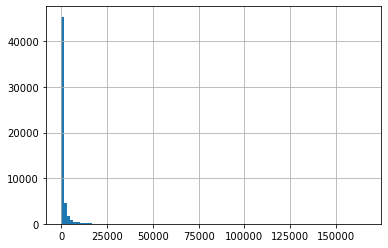

In [5]:
calls['total_call_duration'].hist(bins = 100)

In [6]:
calls['total_call_duration'].max()*60

9969300

In [7]:
print(f"Количество дубликатов в датасете {calls.duplicated().sum()}.") 

Количество дубликатов в датасете 4900.


In [8]:
print(f"Количество дубликатов в датасете {clients.duplicated().sum()}.") 

Количество дубликатов в датасете 0.


In [9]:
def null_info(df):
    null_values = df.isna().sum().reset_index()
    null_values = null_values.rename(columns = {0:'isna'})
    null_values = null_values[null_values['isna'] != 0].reset_index(drop = True)
    null_values['percentage'] = round(null_values['isna']/len(df)*100,2)
    if len(null_values) != 0: 
        for index,row in null_values.iterrows():
            print(f"Количество пропусков в столбце {row['index']} составляет {row['isna']}, что составляет {row['percentage']}% от общего числа")
    else: 
        print(f"пропуски отсутствуют")
    

In [10]:
null_info(calls)

Количество пропусков в столбце internal составляет 117, что составляет 0.22% от общего числа
Количество пропусков в столбце operator_id составляет 8172, что составляет 15.16% от общего числа


In [11]:
null_info(clients)

пропуски отсутствуют


## Предобработка данных

In [12]:
#приводим даты к правильному формату
calls['date'] = pd.to_datetime(calls['date'], format='%Y.%m.%d')
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y.%m.%d')

In [13]:
calls['month'] = calls['date'].dt.month

In [14]:
#избавимся от дубликатови
calls = calls.drop_duplicates().reset_index(drop = True)

In [15]:
#c учетом того, что тарификация происходит за минуту, приведем данные о длительности звонков к значениям в минутах.
calls['call_duration'] = np.ceil(calls['call_duration']/60)
calls['total_call_duration'] = np.ceil(calls['total_call_duration']/60)

In [16]:
#проверим данные на выбросы 
calls.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,month
count,49002.000000,41546.000000,49002.000000,49002.000000,49002.000000,49002.000000
mean,167294.892759,916523.315409,16.462777,14.726930,19.791621,10.192380
std,598.558965,21230.041008,63.604098,62.970904,74.185227,0.852065
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,8.000000
25%,166782.000000,900790.500000,1.000000,0.000000,1.000000,10.000000
50%,167158.000000,913938.000000,4.000000,1.000000,4.000000,10.000000
75%,167819.000000,937708.000000,12.000000,10.000000,16.000000,11.000000
max,168606.000000,973286.000000,4817.000000,2407.000000,2770.000000,11.000000


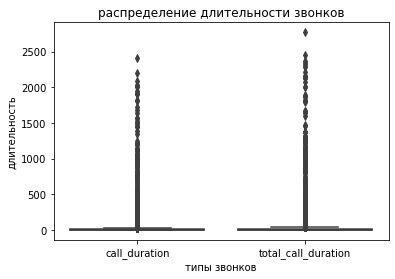

In [17]:
sns.boxplot(data = calls[['call_duration','total_call_duration']])
plt.title ('распределение длительности звонков')
plt.xlabel ('типы звонков')
plt.ylabel ('длительность');

Text(0, 0.5, 'длительность')

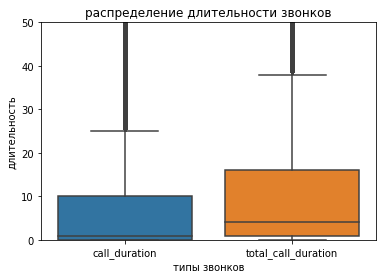

In [18]:
sns.boxplot(data = calls[['call_duration','total_call_duration']])
plt.ylim(0,50)
plt.title ('распределение длительности звонков')
plt.xlabel ('типы звонков')
plt.ylabel ('длительность')

В столбцах с длительностью вызова наблюдаются выбросы, так как медиана очень сильно отличается от 75% перцентиля и среднего. Найдем аномально длинные звонки. Попробуем найти выбросы и исследовать их природу.

,date,operator_id,call_duration,total_call_duration
0,2019-09-25 00:00:00+03:00,885876.0,2407.0,3155.0
1,2019-09-26 00:00:00+03:00,885876.0,2204.0,2782.0
2,2019-09-09 00:00:00+03:00,885876.0,2019.0,2652.0
3,2019-09-18 00:00:00+03:00,885876.0,2028.0,2651.0
4,2019-10-02 00:00:00+03:00,885876.0,2003.0,2556.0


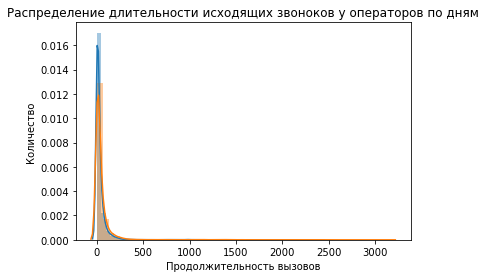

In [19]:
anomal_calls = calls.query('direction == "out"')
anomal_calls = anomal_calls.groupby(['date','operator_id']).agg({'call_duration':'sum','total_call_duration':'sum'}).sort_values('total_call_duration', ascending = False).reset_index()
display(anomal_calls.head(5))
sns.distplot(anomal_calls['call_duration'])
sns.distplot(anomal_calls['total_call_duration']).set(title = 'Распределение длительности исходящих звоноков у операторов по дням',
                                                xlabel = 'Продолжительность вызовов',
                                                ylabel = 'Количество');


In [20]:
anomal_calls = anomal_calls.query('total_call_duration > 720')
display(anomal_calls.describe())
print(f"Общая длительность звонков аномально активных операторов составляет {anomal_calls['total_call_duration'].sum()}, в то время как общая длительность звонков за рассматриваемый период {calls['total_call_duration'].sum()}, поэтому если мы будем удалять звонки аномально активных операторов, то мы лишимся {round(anomal_calls['total_call_duration'].sum()/calls['total_call_duration'].sum()*100,2)} процентов общей длительности")

,operator_id,call_duration,total_call_duration
count,123.000000,123.000000,123.000000
mean,892355.642276,1014.780488,1419.113821
std,15025.194725,443.368783,524.954240
min,885876.000000,45.000000,725.000000
25%,885876.000000,740.000000,1111.500000
50%,885890.000000,926.000000,1298.000000
75%,885890.000000,1138.000000,1553.000000
max,945278.000000,2407.000000,3155.000000


Общая длительность звонков аномально активных операторов составляет 174551.0, в то время как общая длительность звонков за рассматриваемый период 969829.0, поэтому если мы будем удалять звонки аномально активных операторов, то мы лишимся 18.0 процентов общей длительности


Нашли данные об аномально длинных звонках операторов, которые они не могли физически совершить исходя из допущения, что максимальное рабочее время оператора - 12 часов в день, но если мы их уберем, то мы очень сильно порежем выручку. 

Вероятно, что это какие-то ошибки биллинга, о которых нужно будет в дальнейшем сообщить работодателю, но так как мы сейчас анализируем фактические затраты клиентов, то предлагаю эти выбросы не удалять из датасета. 

In [21]:
operators_isna = calls[calls['operator_id'].isna()]
operators_isna.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0.0,1.0,8
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0.0,1.0,8
8,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0.0,2.0,8
16,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0.0,1.0,8
26,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0.0,1.0,8


In [22]:
operators_isna.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,month
count,7456.000000,0.0,7456.000000,7456.000000,7456.000000,7456.000000
mean,167259.123793,NaN,14.024142,1.120842,4.540236,10.088653
std,586.842979,NaN,81.785240,15.796128,21.076476,0.887381
min,166377.000000,NaN,1.000000,0.000000,0.000000,8.000000
25%,166782.000000,NaN,1.000000,0.000000,1.000000,10.000000
50%,167125.000000,NaN,2.000000,0.000000,1.000000,10.000000
75%,167727.000000,NaN,7.000000,0.000000,2.000000,11.000000
max,168606.000000,NaN,2168.000000,437.000000,712.000000,11.000000


In [23]:
display(operators_isna.query('direction == "out"')['total_call_duration'].sum())
round(operators_isna.query('direction == "out"')['total_call_duration'].sum()/calls['total_call_duration'].sum()*100,2)

3083.0

0.32

Доля тарифицириуемых звонков в тех строках, в которых пропущены операторы, очень маленькая, поэтому мы можем избавиться от пропущенных значений и это не повлияет на исследование

In [24]:
internal_isna = calls[calls['internal'].isna()]
internal_isna.groupby('direction').agg({'calls_count':'sum'})

,calls_count
direction,
in,219
out,6


Пропуски в столбце internal практически все входящие, следовательно, они не влияют на тарификацию и мы можем их удалить.

In [25]:
calls = calls.dropna()

## Исследовательский анализ данных

Создадим датафрейм с тарифами

In [26]:
tariffs = pd.DataFrame(
    {
        'tariff_plan': ['A', 'B', 'C'],
        'price_month': [4000, 2000, 1000],
        'calls_internal': [0.1, 0.15, 0.3],
        'calls_external': [0.3, 0.5, 0.7],
        'internal_limit': [2000, 500, 0],
        'operator_cost' : [50, 150, 300]
    }
)

In [27]:
display(calls['date'].min())
calls['date'].max()

Timestamp('2019-08-02 00:00:00+0300', tz='pytz.FixedOffset(180)')

Timestamp('2019-11-28 00:00:00+0300', tz='pytz.FixedOffset(180)')

В датасете отображены данные со 2-ого августа 2019 по 28 ноября 2019 (4 месяца), в то время как по условиям декомпозиции, мы должны рассматривать данные только за последние три месяца.

In [28]:
calls = calls[calls['month'] > (calls['month'].max() - 3)] 

In [29]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


C учетом того, что клиенты тарифицируются в полном объеме в том месяце, в котором они подключились, то мы можем указать месяц их подключения, чтобы было понятно с какого момента нужно считать их оплату.

In [30]:
clients['month_start'] = clients['date_start'].dt.month
clients['month_start_name'] = clients['date_start'].dt.strftime('%B')

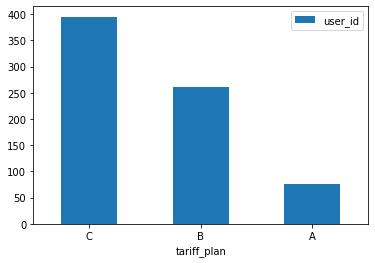

In [31]:
clients.groupby('tariff_plan').agg({'user_id':'count'}).sort_values('user_id', ascending = False).plot(kind = 'bar')
plt.xticks(rotation=0);

Наиболее популярным тарифом является тариф С, так как он самый дешевый, в то время как тариф В находится на втором месте, а тариф А на последнем.

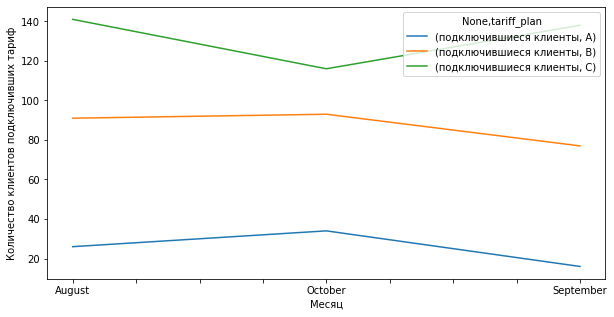

In [32]:
clients.groupby(['month_start_name','tariff_plan']).agg({'user_id':'nunique'}).rename(columns=({'user_id':'подключившиеся клиенты'})).unstack().plot(figsize = (10,5))
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов подключивших тариф');

В октябре наблюдалась некая тенденция к тому, что количество клиентов тарифа С снизилось, в то время как количество клиентов тарифов B и С немного выросло, но в целом клиенты всегда более охотно выбирали тариф С.

In [33]:
clients['current_date'] = calls['date'].max()
clients['total_months'] = clients['current_date'].dt.to_period('M').astype(int) - \
    clients['date_start'].dt.to_period('M').astype(int)


In [34]:
df = calls.merge(clients, on='user_id')

In [35]:
clients['user_id'].nunique()

732

In [36]:
df['user_id'].nunique()

286

Видно, что в таблице с клиентами представлено гораздо больше клиентов, нежели в таблице со звонками, из чего можно сделать вывод, что таблица с клиентами содержит данные о всех клиентах телеком-компании "НуПозвони".

,user_id,month,total_call_duration
0,166377,3,1718.000000
1,166405,3,5117.666667
2,166406,3,1529.666667
3,166407,3,140.666667
4,166485,3,2478.333333
...,...,...,...
213,168481,1,11.000000
214,168500,1,1.000000
215,168601,1,572.000000
216,168603,1,23.000000


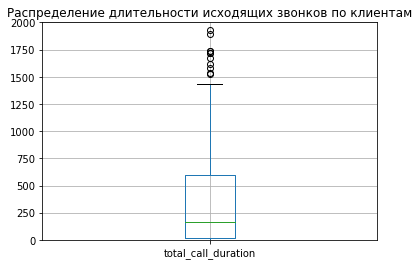

count    218.000000  
mean     1416.013761 
std      5665.909516 
min      0.000000    
25%      21.500000   
50%      161.416667  
75%      595.583333  
max      53897.666667
Name: total_call_duration, dtype: float64

In [37]:
#определим того, кого можно считать активными клиентами. 
#Посмотрим на распределение тарифицируемых звонков в течение рассматриваемого периода.
total_out_calls = calls.query('direction == "out" & internal == False').groupby(['user_id','month']).agg({'total_call_duration':'sum'}).reset_index()
total_out_calls_mean = total_out_calls.groupby('user_id').agg({'month':'count', 'total_call_duration':'mean'}).reset_index()
display(total_out_calls_mean)
total_out_calls_mean.boxplot(column='total_call_duration')
plt.ylim(0,2000)
plt.title('Распределение длительности исходящих звонков по клиентам')
plt.show()
total_out_calls_mean['total_call_duration'].describe()

С учетом того как низко находится 1-ый квартиль на боксплоте, то предлагаю указать в качестве неактивных клиентов тех, кто не попал в него, но пользовался услугами больше 1-ого месяца. 

In [38]:
inactive_clients_threshold = total_out_calls_mean['total_call_duration'].describe()[4]
active_clients = total_out_calls_mean.query('month > 1 & total_call_duration > @inactive_clients_threshold')
print(f'Общее количество клиентов = {df["user_id"].nunique()}, в то время как количество активных клиентов = {active_clients["user_id"].nunique()}')



Общее количество клиентов = 286, в то время как количество активных клиентов = 137


In [39]:
#оставим список активных клиентов, для дальнейшей фильтрации
active_clients_list = active_clients['user_id'].unique()

Рассчитаем выручку по всем клиентам

In [40]:
tariffs

,tariff_plan,price_month,calls_internal,calls_external,internal_limit,operator_cost
0,A,4000,0.10,0.3,2000,50
1,B,2000,0.15,0.5,500,150
2,C,1000,0.30,0.7,0,300


In [41]:
total_ext_minutes = df.query('direction == "out" and internal == False').groupby(['user_id','month','tariff_plan']).agg({'total_call_duration':'sum'}).reset_index().rename(columns = {'total_call_duration':'total_ext_minutes'})
total_int_minutes = df.query('direction == "out" and internal == True').groupby(['user_id','month']).agg({'total_call_duration':'sum'}).reset_index().rename(columns = {'total_call_duration':'total_int_minutes'})

revenue_df = total_ext_minutes.merge(total_int_minutes, how = 'left', on =  ['user_id','month'])


In [42]:
unique_operators_per_month = df.groupby(['user_id','month','tariff_plan'])['operator_id'].nunique().reset_index().rename(columns = {'operator_id':'total_operators'})
revenue_df = revenue_df.merge(unique_operators_per_month, how = 'right', on = ['user_id','month','tariff_plan'])

In [43]:
revenue_df = revenue_df.fillna(0)

In [44]:
def calculate_revenue(revenue_df, tariffs):
    for i, row in tariffs.iterrows():
        tariff_name = row['tariff_plan']
        calls_external = row['calls_external']
        operator_cost = row['operator_cost']
        price_month = row['price_month']
        internal_limit = row['internal_limit']
        calls_internal = row['calls_internal']
        
        revenue_df[f'tariff_{tariff_name}'] = revenue_df['total_ext_minutes']*calls_external \
                                            + revenue_df['total_operators']*operator_cost \
                                            + price_month

        def int_calls(row):
            if row['total_ext_minutes'] > internal_limit:
                return row[f'tariff_{tariff_name}'] + ((row['total_ext_minutes'] - internal_limit)*calls_internal)
            else:
                return row[f'tariff_{tariff_name}']

        revenue_df[f'tariff_{tariff_name}'] = revenue_df.apply(int_calls, axis=1)

    return revenue_df

In [45]:
revenue_df = calculate_revenue(revenue_df, tariffs)

In [46]:
revenue_df

,user_id,month,tariff_plan,total_ext_minutes,total_int_minutes,total_operators,tariff_A,tariff_B,tariff_C
0,166377,9,B,1818.0,5.0,4,4745.4,3706.7,4018.0
1,166377,10,B,1704.0,2.0,5,4761.2,3782.6,4204.0
2,166377,11,B,1632.0,4.0,4,4689.6,3585.8,3832.0
3,166391,9,C,0.0,0.0,1,4050.0,2150.0,1300.0
4,166391,11,C,0.0,0.0,1,4050.0,2150.0,1300.0
...,...,...,...,...,...,...,...,...,...
626,168583,11,B,0.0,0.0,2,4100.0,2300.0,1600.0
627,168598,11,C,0.0,0.0,1,4050.0,2150.0,1300.0
628,168601,11,C,572.0,0.0,2,4271.6,2596.8,2172.0
629,168603,11,B,23.0,0.0,1,4056.9,2161.5,1323.0


In [47]:
def current_tariff_profit(row):
    for i,x in tariffs.iterrows():
        tariff_name = x['tariff_plan']
        if row['tariff_plan'] == tariff_name:
            return row[f'tariff_{tariff_name}']

revenue_df['current_tariff_profit'] = revenue_df.apply(current_tariff_profit,axis = 1)
revenue_df

,user_id,month,tariff_plan,total_ext_minutes,total_int_minutes,total_operators,tariff_A,tariff_B,tariff_C,current_tariff_profit
0,166377,9,B,1818.0,5.0,4,4745.4,3706.7,4018.0,3706.7
1,166377,10,B,1704.0,2.0,5,4761.2,3782.6,4204.0,3782.6
2,166377,11,B,1632.0,4.0,4,4689.6,3585.8,3832.0,3585.8
3,166391,9,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0
4,166391,11,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0
...,...,...,...,...,...,...,...,...,...,...
626,168583,11,B,0.0,0.0,2,4100.0,2300.0,1600.0,2300.0
627,168598,11,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0
628,168601,11,C,572.0,0.0,2,4271.6,2596.8,2172.0,2172.0
629,168603,11,B,23.0,0.0,1,4056.9,2161.5,1323.0,2161.5


Определим наиболее выгодный для клиента тарифный план

In [48]:
revenue_df['best_tariff_plan'] = revenue_df[['tariff_A', 'tariff_B', 'tariff_C']].idxmin(axis=1)


In [49]:
revenue_df['best_tariff_plan'] = revenue_df['best_tariff_plan'].replace('tariff_A', 'A')
revenue_df['best_tariff_plan'] = revenue_df['best_tariff_plan'].replace('tariff_B', 'B')
revenue_df['best_tariff_plan'] = revenue_df['best_tariff_plan'].replace('tariff_C', 'C')

In [50]:
def best_tariff_profit(row):
    for i,x in tariffs.iterrows():
        tariff_name = x['tariff_plan']
        if row['best_tariff_plan'] == tariff_name:
            return row[f'tariff_{tariff_name}']

revenue_df['best_tariff_profit'] = revenue_df.apply(best_tariff_profit,axis = 1)
revenue_df

,user_id,month,tariff_plan,total_ext_minutes,total_int_minutes,total_operators,tariff_A,tariff_B,tariff_C,current_tariff_profit,best_tariff_plan,best_tariff_profit
0,166377,9,B,1818.0,5.0,4,4745.4,3706.7,4018.0,3706.7,B,3706.7
1,166377,10,B,1704.0,2.0,5,4761.2,3782.6,4204.0,3782.6,B,3782.6
2,166377,11,B,1632.0,4.0,4,4689.6,3585.8,3832.0,3585.8,B,3585.8
3,166391,9,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0,C,1300.0
4,166391,11,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0,C,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
626,168583,11,B,0.0,0.0,2,4100.0,2300.0,1600.0,2300.0,C,1600.0
627,168598,11,C,0.0,0.0,1,4050.0,2150.0,1300.0,1300.0,C,1300.0
628,168601,11,C,572.0,0.0,2,4271.6,2596.8,2172.0,2172.0,C,2172.0
629,168603,11,B,23.0,0.0,1,4056.9,2161.5,1323.0,2161.5,C,1323.0


Создали таблицу со всеми возможными тарифами для каждого пользователя, а также текущим и наиболее оптимальным тарифом.

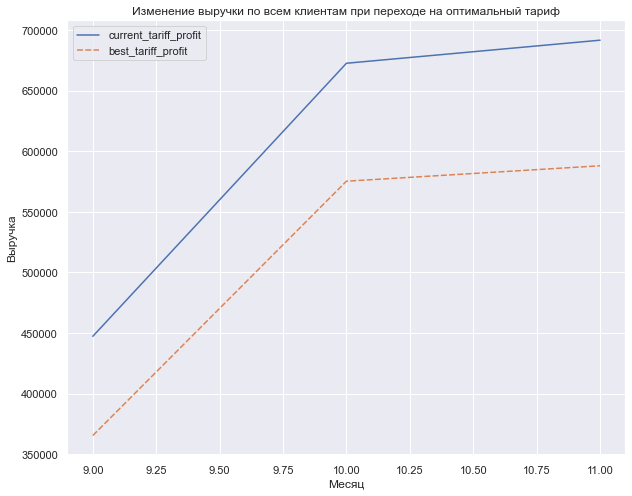

In [51]:
months_revenue = revenue_df.groupby('month').agg({'current_tariff_profit':'sum','best_tariff_profit':'sum'})
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data = months_revenue).set(title = 'Изменение выручки по всем клиентам при переходе на оптимальный тариф',
                                                xlabel = 'Месяц',
                                                ylabel = 'Выручка');


Посмотрим сколько выручки теряется в реальном выражении

In [52]:
months_revenue['loss'] = months_revenue['current_tariff_profit'] - months_revenue['best_tariff_profit']
print(f'потеря выручки составит {round(months_revenue["loss"].sum())}, что составляет {round(months_revenue["loss"].sum()/months_revenue["current_tariff_profit"].sum()*100,2)} процентов от всей выручки')

потеря выручки составит 282814, что составляет 15.61 процентов от всей выручки


Проведем те же расчеты, но только по активным клиентам.

In [53]:
active_revenue_df = revenue_df.query('user_id in @active_clients_list')

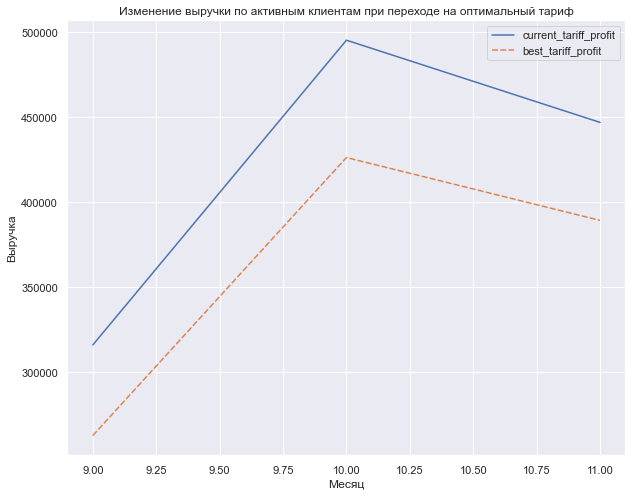

In [54]:
months_revenue_active = active_revenue_df.groupby('month').agg({'current_tariff_profit':'sum','best_tariff_profit':'sum'})
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data = months_revenue_active).set(title = 'Изменение выручки по активным клиентам при переходе на оптимальный тариф',
                                                xlabel = 'Месяц',
                                                ylabel = 'Выручка');

In [55]:
months_revenue_active['loss'] = months_revenue_active['current_tariff_profit'] - months_revenue_active['best_tariff_profit']
print(f'потеря выручки составит {round(months_revenue_active["loss"].sum())}, что составляет {round(months_revenue_active["loss"].sum()/months_revenue_active["current_tariff_profit"].sum()*100,2)} процентов от всей выручки')

потеря выручки составит 180222, что составляет 14.32 процентов от всей выручки


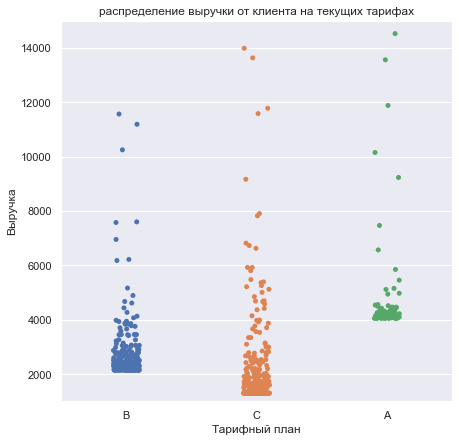

In [56]:
plt.figure(figsize=(7, 7))
ax = sns.stripplot(data = revenue_df, x='tariff_plan', y="current_tariff_profit")
ax.set(title = 'распределение выручки от клиента на текущих тарифах', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

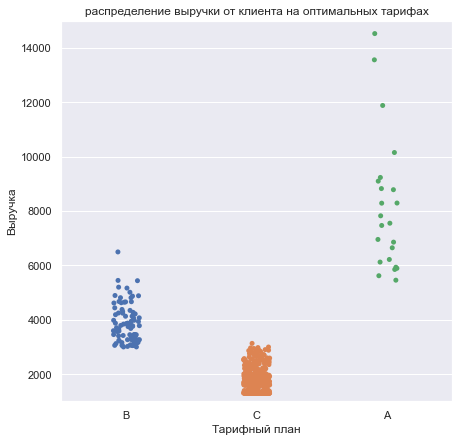

In [57]:
plt.figure(figsize=(7, 7))
ax = sns.stripplot(data = revenue_df, x='best_tariff_plan', y="best_tariff_profit")
ax.set(title = 'распределение выручки от клиента на оптимальных тарифах', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

Видно как переход на оптимальные тарифы снижает выбросы на тарифах B и C, но необходимо проанализировать миграцию клиентов.

In [58]:
aggregated_revenue = revenue_df.groupby(['user_id','tariff_plan']).agg({'tariff_A':'sum',
                                                  'tariff_B':'sum',
                                                  'tariff_C':'sum'}).reset_index()

aggregated_revenue['best_tariff_plan'] = aggregated_revenue[['tariff_A', 'tariff_B', 'tariff_C']].idxmin(axis=1)

aggregated_revenue['best_tariff_plan'] = aggregated_revenue['best_tariff_plan'].replace('tariff_A', 'A')
aggregated_revenue['best_tariff_plan'] = aggregated_revenue['best_tariff_plan'].replace('tariff_B', 'B')
aggregated_revenue['best_tariff_plan'] = aggregated_revenue['best_tariff_plan'].replace('tariff_C', 'C')
aggregated_revenue

,user_id,tariff_plan,tariff_A,tariff_B,tariff_C,best_tariff_plan
0,166377,B,14196.2,11075.10,12054.0,B
1,166391,C,8100.0,4300.00,2600.0,C
2,166392,C,12300.0,6900.00,4800.0,C
3,166399,C,8100.0,4300.00,2600.0,C
4,166405,B,18641.2,19054.45,24953.0,A
...,...,...,...,...,...,...
281,168583,B,8150.0,4450.00,2900.0,C
282,168598,C,4050.0,2150.00,1300.0,C
283,168601,C,4271.6,2596.80,2172.0,C
284,168603,B,4056.9,2161.50,1323.0,C


In [95]:
def recommendation(row):
    dict_params = {'A':3,'B':2, 'C':1}
    dict_params_down = dict(reversed(item) for item in dict_params.items())
    current_tariff = dict_params[row['tariff_plan']]
    if row['tariff_plan'] == row['best_tariff_plan'] :
        return 'optimal'
    else:
        best_tariff = dict_params[str(row['best_tariff_plan'])]
        if current_tariff > best_tariff:
            return 'down_'+ dict_params_down[best_tariff]
        else:
            return 'up_'+ dict_params_down[best_tariff]

In [96]:
aggregated_revenue['recommendation'] = aggregated_revenue.apply(recommendation,axis = 1)
aggregated_revenue

,user_id,tariff_plan,tariff_A,tariff_B,tariff_C,best_tariff_plan,recommendation,current_tariff_profit,best_tariff_profit
0,166377,B,14196.2,11075.10,12054.0,B,optimal,11075.10,11075.1
1,166391,C,8100.0,4300.00,2600.0,C,optimal,2600.00,2600.0
2,166392,C,12300.0,6900.00,4800.0,C,optimal,4800.00,4800.0
3,166399,C,8100.0,4300.00,2600.0,C,optimal,2600.00,2600.0
4,166405,B,18641.2,19054.45,24953.0,A,up_A,19054.45,18641.2
...,...,...,...,...,...,...,...,...,...
281,168583,B,8150.0,4450.00,2900.0,C,down_C,4450.00,2900.0
282,168598,C,4050.0,2150.00,1300.0,C,optimal,1300.00,1300.0
283,168601,C,4271.6,2596.80,2172.0,C,optimal,2172.00,2172.0
284,168603,B,4056.9,2161.50,1323.0,C,down_C,2161.50,1323.0


In [61]:
migration = aggregated_revenue.groupby('recommendation').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'count'})
migration

,count
recommendation,
optimal,158
down_C,102
up_B,13
up_A,8
down_B,5


In [62]:
aggregated_revenue['current_tariff_profit'] = aggregated_revenue.apply(current_tariff_profit, axis = 1)
aggregated_revenue['best_tariff_profit'] = aggregated_revenue.apply(best_tariff_profit, axis = 1)
print(f"общая выручка по всем клиентам составляет:{aggregated_revenue['current_tariff_profit'].sum():.2f}")
print(f"падение выручки составит:{(aggregated_revenue['current_tariff_profit'].sum()-aggregated_revenue['best_tariff_profit'].sum()):.2f}")
print(f"падение выручки в процентах:{1-(aggregated_revenue['best_tariff_profit'].sum()/aggregated_revenue['current_tariff_profit'].sum()):.2f}")


общая выручка по всем клиентам составляет:1811629.70
падение выручки составит:270326.30
падение выручки в процентах:0.15


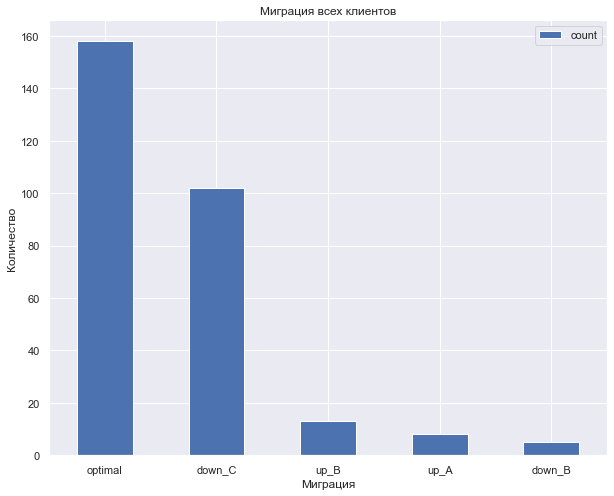

In [63]:
migration.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Миграция всех клиентов')
plt.xlabel('Миграция') 
plt.ylabel('Количество')
plt.show()

Видно, что большинство клиентов должны переехать на пониженный тариф С. Посмотрим на миграцию активных клиентов.

In [64]:
active_aggregated_revenue = aggregated_revenue.query('user_id in @active_clients_list')
active_migration = active_aggregated_revenue.groupby('recommendation').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'count'})
active_migration

,count
recommendation,
optimal,63
down_C,53
up_B,12
down_B,5
up_A,4


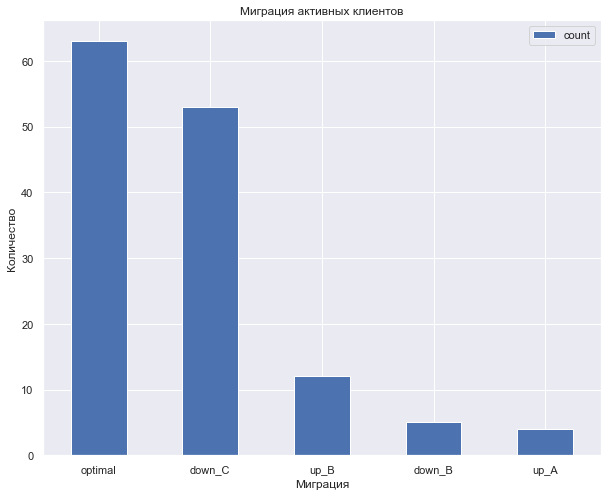

In [65]:
active_migration.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Миграция активных клиентов')
plt.xlabel('Миграция') 
plt.ylabel('Количество')
plt.show()

У активных клиентов соотношение переезда на тариф С примерно такое же. Рассчитаем снижение аггрегированной выручки

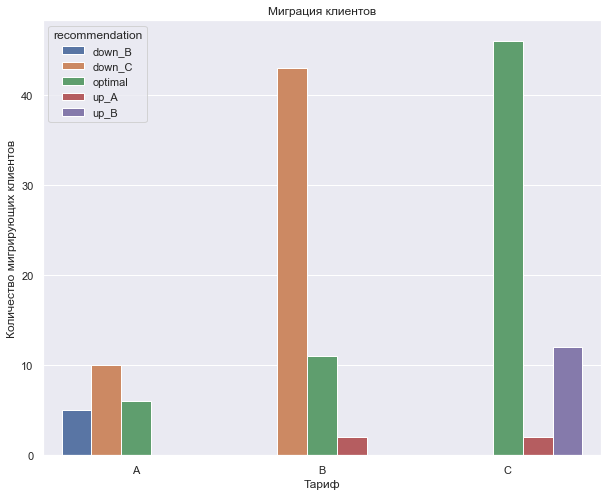

In [66]:
migration_all = active_aggregated_revenue.groupby(['tariff_plan','recommendation']).agg({'user_id':'nunique'}).reset_index()
ax = sns.barplot(x='tariff_plan', y='user_id', hue='recommendation', data=migration_all)
ax.set(title='Миграция клиентов', xlabel='Тариф', ylabel='Количество мигрирующих клиентов')
plt.show()

Наибольшее количество переходов должно произойти с тарифа B на тариф С, в то время как подняться на тариф А должно меньше всего клиентов. 

Попробуем найти снижение выручки по активным клиентом и посмотреть получится ли снизить падение выручки, если мы исключим из данных выбросы по клиентам со слишком активными операторами.

In [67]:
active_aggregated_revenue['current_tariff_profit'] = active_aggregated_revenue.apply(current_tariff_profit, axis = 1)
active_aggregated_revenue['best_tariff_profit'] = active_aggregated_revenue.apply(best_tariff_profit, axis = 1)
print(f"общая выручка по активным клиентам составляет:{active_aggregated_revenue['current_tariff_profit'].sum():.2f}")
print(f"падение выручки составит:{(active_aggregated_revenue['current_tariff_profit'].sum()-active_aggregated_revenue['best_tariff_profit'].sum()):.2f}")
print(f"падение выручки в процентах:{1-(active_aggregated_revenue['best_tariff_profit'].sum()/active_aggregated_revenue['current_tariff_profit'].sum()):.2f}")

общая выручка по активным клиентам составляет:1258295.60
падение выручки составит:169583.90
падение выручки в процентах:0.13


In [68]:
anomal_operators = anomal_calls['operator_id'].unique()
anomal_users = df.query("operator_id in @anomal_operators")['user_id'].unique()
normal_active_aggregated_revenue = active_aggregated_revenue.query('user_id not in @anomal_users')


In [69]:
normal_active_aggregated_revenue['current_tariff_profit'] = normal_active_aggregated_revenue.apply(current_tariff_profit, axis = 1)
normal_active_aggregated_revenue['best_tariff_profit'] = normal_active_aggregated_revenue.apply(best_tariff_profit, axis = 1)
print(f"общая выручка по активным клиентам составляет:{normal_active_aggregated_revenue['current_tariff_profit'].sum():.2f}")
print(f"падение выручки составит:{(normal_active_aggregated_revenue['current_tariff_profit'].sum()-normal_active_aggregated_revenue['best_tariff_profit'].sum()):.2f}")
print(f"падение выручки в процентах:{1-(normal_active_aggregated_revenue['best_tariff_profit'].sum()/normal_active_aggregated_revenue['current_tariff_profit'].sum()):.2f}")


общая выручка по активным клиентам составляет:1098052.40
падение выручки составит:158656.75
падение выручки в процентах:0.14


При попытке убрать выбросы мы снизили общую сумму выручки и падение выручки в натуральном выражении, но в процентном соотношении падение выручки стало больше, поэтому для того чтобы определить способ снижения выручки необходимо будет разобраться с выбросами и изучить их природу.

In [85]:
aggregated_revenue_mean = revenue_df.groupby(['user_id','tariff_plan']).agg({'tariff_A':'mean',
                                                  'tariff_B':'mean',
                                                  'tariff_C':'mean'}).reset_index()
aggregated_revenue_mean['best_tariff_plan'] = aggregated_revenue_mean[['tariff_A', 'tariff_B', 'tariff_C']].idxmin(axis=1)

aggregated_revenue_mean['best_tariff_plan'] = aggregated_revenue_mean['best_tariff_plan'].replace('tariff_A', 'A')
aggregated_revenue_mean['best_tariff_plan'] = aggregated_revenue_mean['best_tariff_plan'].replace('tariff_B', 'B')
aggregated_revenue_mean['best_tariff_plan'] = aggregated_revenue_mean['best_tariff_plan'].replace('tariff_C', 'C')
aggregated_revenue_mean['current_tariff_profit'] = aggregated_revenue_mean.apply(current_tariff_profit, axis = 1)
aggregated_revenue_mean['best_tariff_profit'] = aggregated_revenue_mean.apply(best_tariff_profit, axis = 1)
aggregated_revenue_mean

,user_id,tariff_plan,tariff_A,tariff_B,tariff_C,best_tariff_plan,current_tariff_profit,best_tariff_profit
0,166377,B,4732.066667,3691.700000,4018.000000,B,3691.700000,3691.700000
1,166391,C,4050.000000,2150.000000,1300.000000,C,1300.000000,1300.000000
2,166392,C,4100.000000,2300.000000,1600.000000,C,1600.000000,1600.000000
3,166399,C,4050.000000,2150.000000,1300.000000,C,1300.000000,1300.000000
4,166405,B,6213.733333,6351.483333,8317.666667,A,6351.483333,6213.733333
...,...,...,...,...,...,...,...,...
281,168583,B,4075.000000,2225.000000,1450.000000,C,2225.000000,1450.000000
282,168598,C,4050.000000,2150.000000,1300.000000,C,1300.000000,1300.000000
283,168601,C,4271.600000,2596.800000,2172.000000,C,2172.000000,2172.000000
284,168603,B,4056.900000,2161.500000,1323.000000,C,2161.500000,1323.000000


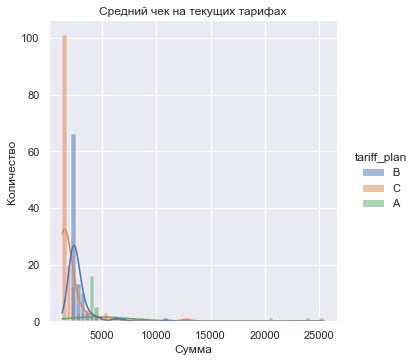

In [71]:
sns.displot(data = aggregated_revenue_mean, x = 'current_tariff_profit', hue = 'tariff_plan', kde = True).set(title = 'Cредний чек на текущих тарифах',
                                                                                                             ylabel = 'Количество',
                                                                                                             xlabel = 'Сумма'
                                                                                                             );

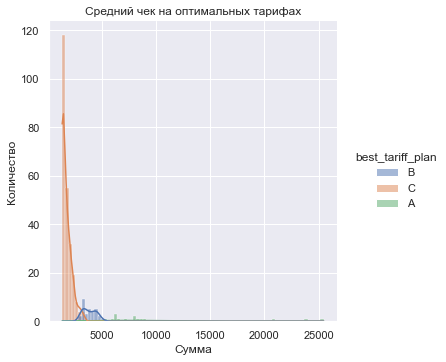

In [72]:
sns.displot(data = aggregated_revenue_mean, x = 'best_tariff_profit', hue = 'best_tariff_plan', kde = True).set(title = 'Cредний чек на оптимальных тарифах',
                                                                                                             ylabel = 'Количество',
                                                                                                             xlabel = 'Сумма')

Видно как основная выручка повлияет на снижение среднего чека и рост числа клиентов-пользователей тарифа С, а также понизит количество пользователей тарифов A и B, но повысит их средний чек.

In [73]:
mean_tariffs_revenue = aggregated_revenue_mean.groupby('tariff_plan').agg({'current_tariff_profit':'mean',
                                                                           'user_id':'count'}).rename(columns = {'user_id':'current_users'}).reset_index()

In [74]:
mean_tariffs_revenue = mean_tariffs_revenue.merge(aggregated_revenue_mean.groupby('best_tariff_plan').agg({'best_tariff_profit':'mean',
                                                                           'user_id':'count'}).reset_index().rename(columns = {'best_tariff_plan':'tariff_plan','user_id':'best_tariff_users'}), on = 'tariff_plan') 
mean_tariffs_revenue

,tariff_plan,current_tariff_profit,current_users,best_tariff_profit,best_tariff_users
0,A,6529.144086,31,10355.271111,15
1,B,2783.740167,100,3828.236559,31
2,C,2090.631183,155,1697.956250,240


## Статистический анализ

### Гипотеза №1
**Нулевая гипотеза**: выручка активных и неактивных клиентов не различается.

**Альтернативная гипотеза:** выручка активных и неактивных клиентов различается.

Значение aplha устанавливается в пять процентов 0.05


In [75]:
unactive_clients_revenue = aggregated_revenue.query('user_id not in @active_clients_list')['current_tariff_profit']
active_clients_revenue = aggregated_revenue.query('user_id in @active_clients_list')['current_tariff_profit']

In [76]:
unactive_clients_revenue.describe()

count    149.000000  
mean     3713.651678 
std      2459.642382 
min      1300.000000 
25%      2198.000000 
50%      2900.000000 
75%      4457.500000 
max      16134.400000
Name: current_tariff_profit, dtype: float64

In [77]:
active_clients_revenue.describe()

count    137.000000  
mean     9184.639416 
std      8631.063572 
min      2994.000000 
25%      4929.500000 
50%      6987.000000 
75%      10336.000000
max      76420.800000
Name: current_tariff_profit, dtype: float64

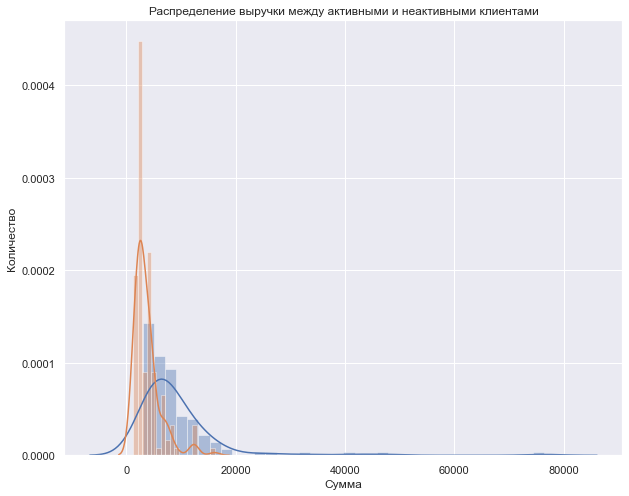

In [78]:
sns.distplot(active_clients_revenue, kde = True)
sns.distplot(unactive_clients_revenue, kde = True).set(title = 'Распределение выручки между активными и неактивными клиентами',
                                               ylabel = 'Количество',
                                               xlabel = 'Cумма'); 

Значения выборок распределены нормально.

In [79]:


alpha = 0.05 

results = st.ttest_ind(
    unactive_clients_revenue, 
    active_clients_revenue)

print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение 1.3832482247030934e-12
Отвергаем нулевую гипотезу


Текущая выручка активных и неактивных клиентов различается. Отвергаем нулевую гипотезу в пользу альтернативной.

### Гипотеза №2
**Нулевая гипотеза**: выручка клиентов тарифа A и B не различается.

**Альтернативная гипотеза:** выручка клиентов тарифа A и B различается.

Значение aplha устанавливается в пять процентов 0.05


In [80]:
tariff_A_revenue = aggregated_revenue.query('tariff_plan == "A"')['current_tariff_profit']
tariff_B_revenue = aggregated_revenue.query('tariff_plan == "B"')['current_tariff_profit']

In [81]:
tariff_A_revenue.describe()

count    31.000000   
mean     15148.464516
std      14595.233670
min      4050.000000 
25%      8621.300000 
50%      12450.000000
75%      13718.900000
max      76420.800000
Name: current_tariff_profit, dtype: float64

In [82]:
tariff_B_revenue.describe()

count    100.00000  
mean     6333.83300 
std      3950.66782 
min      2150.00000 
25%      4341.25000 
50%      6450.75000 
75%      7582.36250 
max      33014.15000
Name: current_tariff_profit, dtype: float64

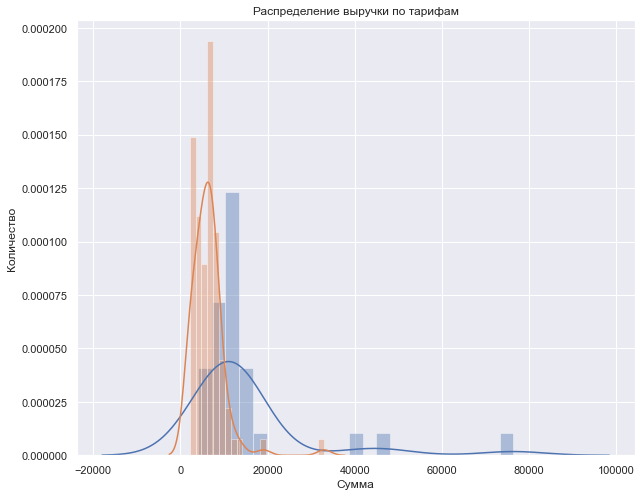

In [83]:
sns.distplot(tariff_A_revenue, kde = True)
sns.distplot(tariff_B_revenue, kde = True).set(title = 'Распределение выручки по тарифам',
                                               ylabel = 'Количество',
                                               xlabel = 'Cумма'); 

Значения выборок распределены нормально.

In [84]:
alpha = 0.05 

results = st.ttest_ind(
    tariff_A_revenue, 
    tariff_B_revenue)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.2800567670735054e-07
Отвергаем нулевую гипотезу


Текущая средняя выручка клиентов тарифа A и B различается. Отвергаем нулевую гипотезу в пользу альтернативной.

# Выводы

#### 1. Ход исследования
Для анализа было предоставлено два датасета - один со звонками, а второй с данными клиентов. В ходе исследования была проведена предобработка данных, найдены выбросы, посчитаны все возможные тарифы для каждого абонента, оптимальные тарифы и проанализирована возможная миграция и падение выручки. 

#### 2. Расчет общей выручки
Общая выручка по всем клиентам составляет: 1811629.70 рублей, падение падение выручки при переходе составит: 270326.30 рублей.

Падение выручки в процентах:0.15

#### 3. Расчет выручки по активным клиентам
Общая выручка по активным клиентам составляет: 1098052.40 рублей, падение выручки при переходе составит: 158656.75 рублей. 

Падение выручки в процентах:0.14

#### 4. Миграция клиентов. 
66 активных клиентов находятся на своих тарифах, 55 из них перейдут с понижением на тариф С, 13 повысятся до тарифа B, 5 понизятся до тарифа B, 3 повысятся до тарифа A. Самый популярный тариф для перехода - C.

#### 4. Варианты минимизации потери выручки
Потеря выручки при переходе на оптимальные тарифы неминуема, но перед тем как это давать рекомендации необходимо разобраться с аномально активным операторами, которые совершали много звонков в день, так как если их данные не будут входить в биллинг, то их необходимо исключить.
#### 5. Средние чеки до и после перехода

При переходе на тарифах А и В средние чеки растут, но сокращается количество абонентов, а на тарифе С наоборот.

**До перехода средние чеки выглядят следующим образом:**

На тарифе А средний чек составляет 6529.14 рублей и количество пользователей 31

На тарифе B средний чек составляет 2783.74 рублей и количество пользователей 100

На тарифе С средний чек составляет 2090.63 рублей и количество пользователей 155


**После перехода ситуация изменяется**

На тарифе А средний чек составляет 10355.27 рублей и количество пользователей 15

На тарифе B средний чек составляет 3828.23 рублей и количество пользователей 31

На тарифе С средний чек составляет 1697.95 рублей и количество пользователей 240

#### 6. Статистический анализ
В ходе статистического анализа определено, что выручка активных и неактивных клиентов отличается, а также отличается выручка между клиентами тарифов А и B.
